Let $\boldsymbol{x}\in\mathbb{R}^{d}$, where d$\in\mathbb{N}$ is finite, e.g. 100. Furthermore, for $\boldsymbol{x}$ $\sum_{k=1}^{d}x_{k}=1\wedge\left(\forall k\in\left\{ 1,2,\ldots,d\right\} \right)\left(\boldsymbol{x}_{k}>0\right)$ holds.
This condition ensures the form of a distribution with finite support of $\boldsymbol{x}$. 

The paramers of the problem are $\left\{ \boldsymbol{\alpha}\right\} _{i\in\mathbb{N}}\in\mathbb{R}^{d}$. There are no further limitations for $\boldsymbol{\alpha}_{i}$.
Then, the following function is to be optimized:

$-\sum_{i}\boldsymbol{\alpha}_{i}\cdot\boldsymbol{x}$,

where the structure of $\alpha$ is $\alpha_{i,k}=\left\{ \begin{array}{cc}
k\Delta-\Delta_{i,0}, & \text{ for }k<m_{i},\\
0, & \text{ else}.
\end{array}\right.$.

The $\boldsymbol{\alpha}_{i}$ depends on two parameters $\Delta_{i}\in\mathbb{R}$ and $0\leq m_{i}\leq d$  only.

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import external libraries
import pandas as pd
from tqdm.notebook import tqdm

In [4]:
def rel(x):
    return len([n for n in x if n < np.inf])/len(x)
def mne(x):
    return np.mean([n for n in x if n < np.inf])
def feo(x):
    return mne(x)/rel(x)

In [5]:
import objfun_distribution_opt as dopt

In [6]:
alphas = [{"r": 15, "m": 10},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5}]
delta = 1
d = 15
problem = dopt.VolumeDistribution(d, delta, alphas)

x = problem.generate_point()
# print(x)
# x = np.reshape([0 if i != 9 else 1 for i in range(0,d)],(1, d))
# print(x)
print(problem.alphas)

print(problem.evaluate(x))

[[ 5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]]
-23.545309291212583


### Heuristics application

In [7]:
alphas = [{"r": 15, "m": 10},{"r": 5, "m": 5},{"r": 6, "m": 6},{"r": 5, "m": 5},{"r": 7, "m": 7}, {"r": 20, "m": 1},
          {"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14}]
delta = 1
d = 15
prob_unlimited = dopt.VolumeDistribution(d, delta, alphas)

x_star = np.zeros(d)
s = 0
for a in alphas:
    x_star[int(a["m"] / delta)] += a["r"]
    s += a["r"]
x_star /= s

print(prob_unlimited.evaluate(x_star))
prob = dopt.VolumeDistribution(d, delta, alphas, prob_unlimited.evaluate(x_star))

19.63793103448276


In [8]:
for i in range(100):
    _x = prob.generate_point()
    f = prob.evaluate(_x)
    if f < prob.get_fstar(): 
        print((_x, prob.evaluate(_x)))

(array([0.07512948, 0.02358131, 0.03871577, 0.01240485, 0.07832502,
       0.07698738, 0.07140394, 0.06411804, 0.09768171, 0.08215007,
       0.0827912 , 0.0891202 , 0.08607452, 0.04702498, 0.07449153]), 17.221242389793783)
(array([0.05750637, 0.05608794, 0.03526467, 0.09163859, 0.04009846,
       0.06675049, 0.09816524, 0.08471175, 0.1035977 , 0.10145975,
       0.06869572, 0.01773739, 0.06966475, 0.0549451 , 0.05367607]), 18.888678590012425)
(array([0.04655857, 0.06707423, 0.10202232, 0.07505207, 0.05746425,
       0.04118272, 0.01808954, 0.01840292, 0.07667304, 0.03504744,
       0.00530737, 0.06498826, 0.15200577, 0.08550217, 0.15462933]), 19.001327982658)
(array([0.04136072, 0.03468431, 0.08221346, 0.06756559, 0.08401896,
       0.06713808, 0.01692352, 0.07988125, 0.09076456, 0.09465083,
       0.09500501, 0.07580587, 0.05765843, 0.07366901, 0.0386604 ]), 18.995489407698532)
(array([0.0977604 , 0.04289077, 0.00528157, 0.08235334, 0.08066257,
       0.06643962, 0.1054729 , 0.068840

       0.11026222, 0.00619011, 0.07955014, 0.06494376, 0.05684935]), 17.82019564799935)
(array([0.01842437, 0.07502026, 0.03704863, 0.05052888, 0.08468146,
       0.08736054, 0.09814205, 0.0715797 , 0.103393  , 0.10388424,
       0.02136695, 0.10471207, 0.07192823, 0.06838999, 0.00353963]), 18.789219361056805)
(array([0.08020221, 0.05716271, 0.08028381, 0.04530131, 0.054923  ,
       0.10822675, 0.07351421, 0.06404402, 0.01156153, 0.0323375 ,
       0.05533839, 0.10207205, 0.08261628, 0.05485185, 0.09756439]), 19.619688849694217)
(array([0.01430663, 0.03921504, 0.0893418 , 0.08997168, 0.00540481,
       0.02793583, 0.00356616, 0.06791434, 0.15532512, 0.07936579,
       0.07903543, 0.15875441, 0.09072926, 0.09267854, 0.00645517]), 18.562162206429214)
(array([0.02416774, 0.01769783, 0.00128398, 0.12530638, 0.10031439,
       0.11033199, 0.07292744, 0.11706041, 0.10753017, 0.04657308,
       0.0476958 , 0.01799131, 0.06900398, 0.09598833, 0.04612717]), 17.468862074848303)
(array([0.046425

## Random shooting test

In [9]:
from heur_sg import ShootAndGo

for i in range(10):
    sg = ShootAndGo(prob, 1000, 0)
    sg.search()
    print(sg.best_y, sg.best_x, sg.neval)

18.78104959033722 [0.0033551  0.00424525 0.09077085 0.15218077 0.00305091 0.07822242
 0.12995788 0.10821384 0.06285905 0.10064644 0.11346816 0.05204524
 0.02882207 0.01296941 0.05919261] 1
18.753273352003326 [0.02178501 0.05932999 0.12767295 0.0308284  0.118173   0.01558711
 0.01493812 0.10136191 0.04182519 0.08001732 0.06616345 0.05727225
 0.03618136 0.12870656 0.10015737] 3
18.079600564626606 [0.02362516 0.11274738 0.06346559 0.0401376  0.00438524 0.11079809
 0.04719839 0.13642151 0.04959252 0.08372347 0.02124552 0.10602154
 0.01688682 0.07994968 0.10380151] 1
18.86205611718817 [0.06961316 0.10229277 0.02014221 0.05477633 0.02806941 0.13366194
 0.11720592 0.13044677 0.00450674 0.05185397 0.00536043 0.00895006
 0.10914787 0.11403589 0.04993652] 1
17.834372766360353 [0.0202725  0.0590904  0.03920892 0.01062159 0.10665338 0.1689592
 0.04946131 0.19489993 0.04167429 0.2050438  0.01035275 0.01402229
 0.02181167 0.01867873 0.03924925] 4
18.680532857541802 [0.0465187  0.00102961 0.08910271 

### Genetic optimization
Manual configuration of the problem and test of the GO heuristics with the normalization correction.

In [10]:
import heur_aux

normCorr = heur_aux.NormalizeCorrection(prob)
xx = np.reshape([1 for i in range(15)],15)
print(normCorr.correct(xx))

## vectors = np.reshape([[-1 if i == j-1 else (1 if i == j else 0) for i in range(15)]for j in range(1,15)], (14, 15)).T
## print(vectors)
## print(np.dot(vectors[:,1],  vectors[:,0]))
## q, r = np.linalg.qr(vectors, mode = 'complete')
## 
## print(np.dot(q.T,np.dot(q.T,xx)))
## print(np.linalg.lstsq(vectors, xx))
## og_proj = heur_aux.OGProjectionCorrection(prob, vectors)


[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


In [11]:
from heur_go import Crossover, UniformMultipoint, RandomCombination

In [12]:
from heur_go import GeneticOptimization
from heur_fsa import FastSimulatedAnnealing

In [13]:
from heur_aux import CauchyMutation, Mutation, NormalizeCorrection, ExtensionCorrection, MirrorCorrection, Correction

In [14]:
cauchy = CauchyMutation(r=1, correction=NormalizeCorrection(prob))
cauchy.mutate(np.array([6.12, -4.38,  2.96]))

array([0.65987334, 0.24967467, 0.09045199])

In [15]:
heur = GeneticOptimization(prob, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=UniformMultipoint(1))
res = heur.search()
res

{'best_y': 19.252194976697524,
 'best_x': array([0.08932751, 0.08594549, 0.06628426, 0.02028438, 0.10746558,
        0.14172513, 0.01808159, 0.01007128, 0.04286044, 0.00724031,
        0.10171383, 0.04345412, 0.11405456, 0.01041017, 0.14108135]),
 'neval': 4,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [16]:
heur = GeneticOptimization(prob, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=RandomCombination())
res = heur.search()
res

{'best_y': 18.102331088817213,
 'best_x': array([0.04112783, 0.09538478, 0.05487982, 0.07080539, 0.04838066,
        0.04125797, 0.11368666, 0.05871032, 0.0278074 , 0.03958887,
        0.11178913, 0.02102096, 0.11182263, 0.0646178 , 0.09911979]),
 'neval': 2,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [17]:
sum(res['best_x'])

1.0

In [18]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=10,
                            M=30,
                            Tsel1=0.5,
                            Tsel2=0.1, 
                            mutation=cauchy, crossover=UniformMultipoint(1) )
res = heur.search()
res

{'best_y': 0.2827096363425217,
 'best_x': array([2.64073563e-04, 1.89136588e-03, 7.36709126e-04, 1.33980068e-04,
        4.00639724e-04, 5.43791838e-05, 1.67512292e-03, 4.14916168e-04,
        1.93687257e-03, 2.14926362e-03, 9.77085914e-04, 1.77301943e-03,
        1.15681827e-03, 4.19163342e-03, 9.82244120e-01]),
 'neval': inf,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [19]:
heur = GeneticOptimization(prob_unlimited, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=RandomCombination())
res = heur.search()
res

{'best_y': 0.05921560402938158,
 'best_x': array([4.46360951e-04, 1.44605820e-04, 1.18523384e-04, 1.96732978e-04,
        2.81385152e-04, 8.15277540e-06, 1.42628967e-04, 3.35853163e-05,
        1.87885912e-04, 2.76085776e-04, 1.79226383e-04, 1.68202162e-04,
        4.62355879e-05, 2.34217573e-04, 9.97536171e-01]),
 'neval': inf,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

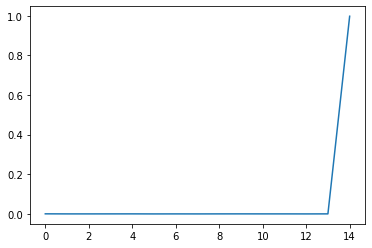

In [20]:


plt.plot(res['best_x'])

### Now, let us move to more complex setup of the problem
- Generate more $\boldsymbol{\alpha}$ parameters.
- Create an expert estimate of $f^{*}$.
- Analyze the problem and create an estimate of the $f^{*}$.

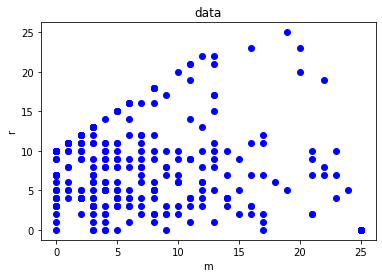

In [21]:
np.random.seed(123545)
alphas = [{"r": int(np.random.gamma(2, 5)), "m": int(np.random.gamma(1, 9))} for i in range(300)]

for alpha in alphas:
    if alpha['m'] >= 25:
        alpha['m'] = 25
        alpha['r'] = 0
    if alpha['r'] - alpha['m'] > 10:
        alpha['r'] = 10 + alpha['m']

#alphas = [{"r": i *2, "m": i * 2} for i in range(10)] 
#alphas = [{"r": 3, "m": 12}, {"r": 2, "m": 15}, {"r": 0, "m": 20} ] 
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('r')
ax1.set_xlabel('m')
ax1.set_title('data')
line, = ax1.plot([alpha['m'] for alpha in alphas], [alpha['r'] for alpha in alphas], 'bo')

plt.show()

10.117857142857126


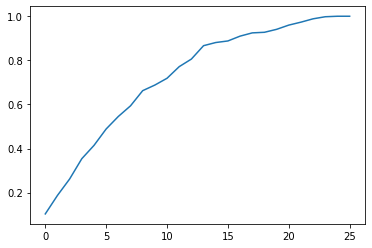

In [22]:
delta = 1
d = int(max([alpha['m'] for alpha in alphas])/delta) + 1
prob_unlimited = dopt.VolumeDistribution(d, delta, alphas)
prob_pen_unlimited = dopt.VolumeDistributionPenalization(d, delta, alphas, -np.inf, 1e-2)
x_star = np.zeros(d)
s = 0
for a in alphas:
    x_star[int(a["m"] / delta)] += a["r"]
    s += a["r"]
x_star /= s

plt.figure()
plt.plot(np.cumsum(x_star))
print(prob_unlimited.evaluate(x_star))

## Setup the problem of volume distribution fitness
prob = dopt.VolumeDistribution(d, delta, alphas, prob_unlimited.evaluate(x_star))
## Setup the problem with penalization
prob_pen = dopt.VolumeDistributionPenalization(d, delta, alphas, prob_unlimited.evaluate(x_star), 0)

Our first estimate of $f^{*}$ is 10.12.

Now lets try to obtain other estimates by utilizing the genetic optimization.

-63.350667887835684


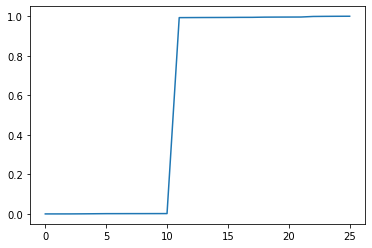

In [23]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=50,
                            M=150,
                            Tsel1=0.5,
                            Tsel2=0.1, 
                            mutation=cauchy, crossover=UniformMultipoint(1) )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

-63.804984497054264


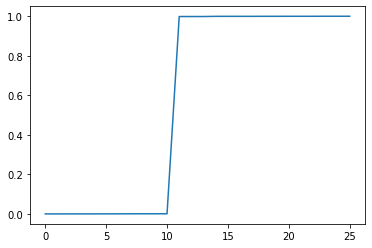

In [24]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=10,
                            M=30,
                            Tsel1=0.5,
                            Tsel2=0.2, 
                            mutation=cauchy, crossover=RandomCombination() )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

-61.692007641154156


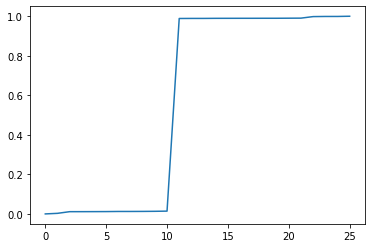

In [25]:
heur = FastSimulatedAnnealing( prob_unlimited,
                               maxeval=1000,
                               T0=1,
                               n0=1, 
                               alpha=2, 
                               mutation=cauchy )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

The result is very good in comparison with the first estimate. However, I hoped for smoother solution.
Simulated annealing gives also a good result.

Lets try the prepared problem with penalization.

In [26]:
## Setup the good enough value of fstar
prob.fstar = -50

NUM_RUNS = 100
maxeval = 1000

### Utilization of penalization
In the following test genetic optimization with different setups of corrections and Cauchy diameter setting is utilized. There are also various values of penalization parameter tested. I want to see whether the result (`best_x`) is be admissible, i.e. $\sum_{k=1}^{d}x_{k}=1$.

In [27]:
NUM_RUNS = 100
resultsPen = pd.DataFrame()
runs = []
corrections = [ {"name": "correction", 'corr': Correction(prob_pen)},
                {"name": "extension", 'corr': ExtensionCorrection(prob_pen)},
                {"name": "mirror", 'corr': MirrorCorrection(prob_pen)} ]
for correction in corrections: 
    for Cr in [0.01, 0.1, 0.5, 1]:
        for p in [0.8, 0.1, 0.01, 0.005]:
            prob_pen_unlimited.penalization = p
            heur_name = 'GO_DOP(p:{},Cr:{},corr:{})'.format(p, Cr, correction['name'])
            for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
                run = GeneticOptimization( prob_pen_unlimited, 
                                            maxeval=1000,
                                            N=50,
                                            M=100,
                                            Tsel1=0.5,
                                            Tsel2=0.2, 
                                            mutation=CauchyMutation(r=Cr, correction=correction['corr']),
                                            crossover=UniformMultipoint(1) ).search()
                run['run'] = i
                run['heur'] = heur_name
                run['penalization'] = p
                run['correction'] = correction['name']
                run['Cr'] = Cr
                runs.append(run)

            res_df = pd.DataFrame(runs,
                                  columns=['heur',
                                           'penalization', 
                                           'correction', 
                                           'Cr',
                                           'run',
                                           'best_x',
                                           'best_y',
                                           'neval'] )
            resultsPen = pd.concat([resultsPen, res_df], axis=0)


In [28]:
def avg_sum(x):
    return np.mean(np.sum(x))
def admissibility_rate(x):
    return len([n for n in x if np.sum(n) == 1])/len(x)

results_pivot = resultsPen.pivot_table(
    index=['penalization', 'heur'],
    values=['best_x'],
    aggfunc=(avg_sum, admissibility_rate)
)['best_x']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='admissibility_rate')

,penalization,heur,admissibility_rate,avg_sum
0,0.005,"GO_DOP(p:0.005,Cr:0.01,corr:correction)",0.00,477.170987
14,0.010,"GO_DOP(p:0.01,Cr:0.01,corr:mirror)",0.00,56.131925
12,0.010,"GO_DOP(p:0.01,Cr:0.01,corr:correction)",0.00,179.993220
24,0.100,"GO_DOP(p:0.1,Cr:0.01,corr:correction)",0.00,180.787982
2,0.005,"GO_DOP(p:0.005,Cr:0.01,corr:mirror)",0.00,136.696506
3,0.005,"GO_DOP(p:0.005,Cr:0.1,corr:correction)",0.00,532.221802
1,0.005,"GO_DOP(p:0.005,Cr:0.01,corr:extension)",0.02,351.884665
36,0.800,"GO_DOP(p:0.8,Cr:0.01,corr:correction)",0.16,184.619079
15,0.010,"GO_DOP(p:0.01,Cr:0.1,corr:correction)",0.18,175.476203
26,0.100,"GO_DOP(p:0.1,Cr:0.01,corr:mirror)",0.20,57.717947


In [29]:
results_pivot = resultsPen.pivot_table(
    index=['heur', 'penalization'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

C:\Users\Tom\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Tom\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,heur,penalization,rel
0,"GO_DOP(p:0.005,Cr:0.01,corr:correction)",0.005,0.0
26,"GO_DOP(p:0.1,Cr:0.01,corr:mirror)",0.100,0.0
27,"GO_DOP(p:0.1,Cr:0.1,corr:correction)",0.100,0.0
28,"GO_DOP(p:0.1,Cr:0.1,corr:extension)",0.100,0.0
29,"GO_DOP(p:0.1,Cr:0.1,corr:mirror)",0.100,0.0
30,"GO_DOP(p:0.1,Cr:0.5,corr:correction)",0.100,0.0
31,"GO_DOP(p:0.1,Cr:0.5,corr:extension)",0.100,0.0
32,"GO_DOP(p:0.1,Cr:0.5,corr:mirror)",0.100,0.0
33,"GO_DOP(p:0.1,Cr:1,corr:correction)",0.100,0.0
34,"GO_DOP(p:0.1,Cr:1,corr:extension)",0.100,0.0


Notes:
---
- The lower radius of the correction the higher chance for the result to be admissible.
- The lower penalization coeficient the lower admissibility rate.
- None of the setups have reached the value of -50 or lower. Therefore all have 0 reliability.

## Conclusion:
The approach using penalization is probably not that good in this kind of problem.

### Genetic optimization test on non-penalized problem

In [31]:
resultsGO = pd.DataFrame()
runs = []
for setup in [{'N': 50, 'M': 150, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.2, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.2,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.01,},
              {'N': 50, 'M': 100, 'multipoint': 2, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 4, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 6, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,}
             ]:
    heur_name = 'GO_(N:{},M:{},T1:{},T2:{},Cr:{},mult:{})'.format( setup['N'],
                                                                   setup['M'],
                                                                   setup['T1'],
                                                                   setup['T2'],
                                                                   setup['Cr'],
                                                                   setup['multipoint'] )
    for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
        run = GeneticOptimization( prob, 
                                   maxeval=maxeval,
                                   N=setup['N'],
                                   M=setup['M'],
                                   Tsel1=setup['T1'],
                                   Tsel2=setup['T2'], 
                                   mutation=CauchyMutation(r = setup['Cr'], correction =NormalizeCorrection(prob)),
                                   crossover=UniformMultipoint(setup['multipoint']) ).search()
        run['run'] = i
        run['heur'] = heur_name
        runs.append(run)
    
    res_df = pd.DataFrame(runs, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])
    resultsGO = pd.concat([resultsGO, res_df], axis=0)


### Results of GO

In [32]:
results_pivot = resultsGO.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

,heur,feo,mne,rel
3,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:4)",424.913495,361.176471,0.85
0,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.01,mult:1)",444.226609,382.034884,0.86
4,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",433.423472,372.744186,0.86
6,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:1,mult:1)",365.556877,318.034483,0.87
2,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:2)",415.049383,373.544444,0.90
7,"GO_(N:50,M:100,T1:0.5,T2:0.2,Cr:1,mult:1)",416.012346,374.411111,0.90
8,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",417.751479,380.153846,0.91
5,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",406.846990,382.436170,0.94
1,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:1)",337.839335,320.947368,0.95


In [33]:
resultsGO.sort_values(by=['best_y'], inplace=True)
resultsGO

,heur,run,best_x,best_y,neval
620,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:2)",20,"[6.4738806890920095e-06, 5.6062032552770495e-0...",-63.995317,177.0
620,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:2)",20,"[6.4738806890920095e-06, 5.6062032552770495e-0...",-63.995317,177.0
620,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:2)",20,"[6.4738806890920095e-06, 5.6062032552770495e-0...",-63.995317,177.0
131,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:1,mult:1)",31,"[2.347732954678291e-06, 1.2565390161854134e-06...",-63.993792,339.0
131,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:1,mult:1)",31,"[2.347732954678291e-06, 1.2565390161854134e-06...",-63.993792,339.0
...,...,...,...,...,...
469,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",69,"[0.002205280120119328, 0.0010484629011277046, ...",-40.096533,inf
469,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",69,"[0.002205280120119328, 0.0010484629011277046, ...",-40.096533,inf
469,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",69,"[0.002205280120119328, 0.0010484629011277046, ...",-40.096533,inf
469,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",69,"[0.002205280120119328, 0.0010484629011277046, ...",-40.096533,inf


In [35]:
resultsRS = pd.DataFrame()
runs = []
heur_name = 'RS_{}'.format(maxeval)
for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
    run = ShootAndGo(prob, maxeval, 0).search()
    run['run'] = i
    run['heur'] = heur_name
    runs.append(run)
    
res_df = pd.DataFrame(runs, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])
resultsRS = pd.concat([resultsRS, res_df], axis=0)

In [36]:
results_pivot = resultsRS.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

,heur,rel
0,RS_1000,0.0


In [37]:
resultsRS.sort_values(by=['best_y'], inplace=True)
resultsRS

,heur,run,best_x,best_y,neval
58,RS_1000,58,"[0.0011516312335393927, 0.0002763061415373276,...",-16.100966,inf
70,RS_1000,70,"[0.014781668400531484, 0.0018398509033552754, ...",-15.393416,inf
37,RS_1000,37,"[0.003072653316818609, 0.007438733803422267, 0...",-14.516809,inf
27,RS_1000,27,"[0.0011346834202400997, 0.029969242632115162, ...",-14.011076,inf
5,RS_1000,5,"[0.0074833519246829345, 0.001798198068404836, ...",-13.704761,inf
...,...,...,...,...,...
49,RS_1000,49,"[0.014694935583315822, 0.04031548877141456, 0....",-8.153583,inf
11,RS_1000,11,"[0.021339901166269572, 0.007083716432129614, 0...",-7.967033,inf
47,RS_1000,47,"[0.009726495415154158, 0.017720602015461124, 0...",-7.943908,inf
65,RS_1000,65,"[0.0038460584896595103, 0.04282430263723379, 0...",-7.924220,inf


# Conclusion
In this work a specific problem with unknown $f^{*}$ was tested. At first the implementation of the problem was tested. Then, a more complex setup were created and the problem was analyzed.
For the sake of analysis we prepared an estimate of the `x_star`. However, this estimate of `x_star` and $f^{*}$ was surpassed by the genetic optimization at first run. Therefore, the $f^{*}$ of the problem was updated according to the new result. The following table summarizes the tested heuristics.

| heuristics | problem | result |
|:---:|:---:|:---|
|Genetic optimization| penalized | The result was pretty bad, [see](#Notes:) |
|Genetic optimization|non-penalized| The result is very good and the reliability hits over 90% ([see](#Results-of-GO)), however the solution is not as smooth as was expected.|
|Random Shooting|non-penalized| This heuristics never hit the $f^{*}$ |

Note: The resuts generated by PSO have the same behaviour as the ones from GO algorithm.